In [1]:
from train import get_data
from pathlib import Path
from fastai import *
from fastai.train import *
from fastai.basic_data import *
from fastai.vision import *

/home/fredmonroe/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [53]:
bs = 1
tile_sz = 1024
size = 1024
n_frames = 5
cutout = False
datasetname = 'livemito_001'

gauss_sigma = (0.5,3.7)
pscale = (5,30)

multi_str = f'_t_{n_frames}'
data_path = Path('.')
datasets = data_path/'datasets'
datasources = data_path/'data'
dataset = datasets/datasetname
pickle_models = data_path/'stats/models'

if tile_sz is None:
    hr_tifs = dataset/f'hr'
    lr_tifs = dataset/f'lr'
else:
    hr_tifs = dataset/f'hr_t_{tile_sz:d}{multi_str}'
    lr_tifs = dataset/f'lr_t_{tile_sz:d}{multi_str}'

print(datasets, dataset, hr_tifs)

model_dir = 'models'
data = get_data(bs, size, lr_tifs, hr_tifs, n_frames=n_frames,  max_zoom=4., use_cutout=cutout, 
                gauss_sigma=gauss_sigma, pscale=pscale)


datasets datasets/livemito_001 datasets/livemito_001/hr_t_1024_t_5


In [54]:
b = data.one_batch(DatasetType.Train)

In [55]:
b[0].shape

torch.Size([1, 5, 256, 256])

In [56]:
img = F.interpolate(b[0], scale_factor=4, mode='bilinear', align_corners=False)
img.shape

torch.Size([1, 5, 1024, 1024])

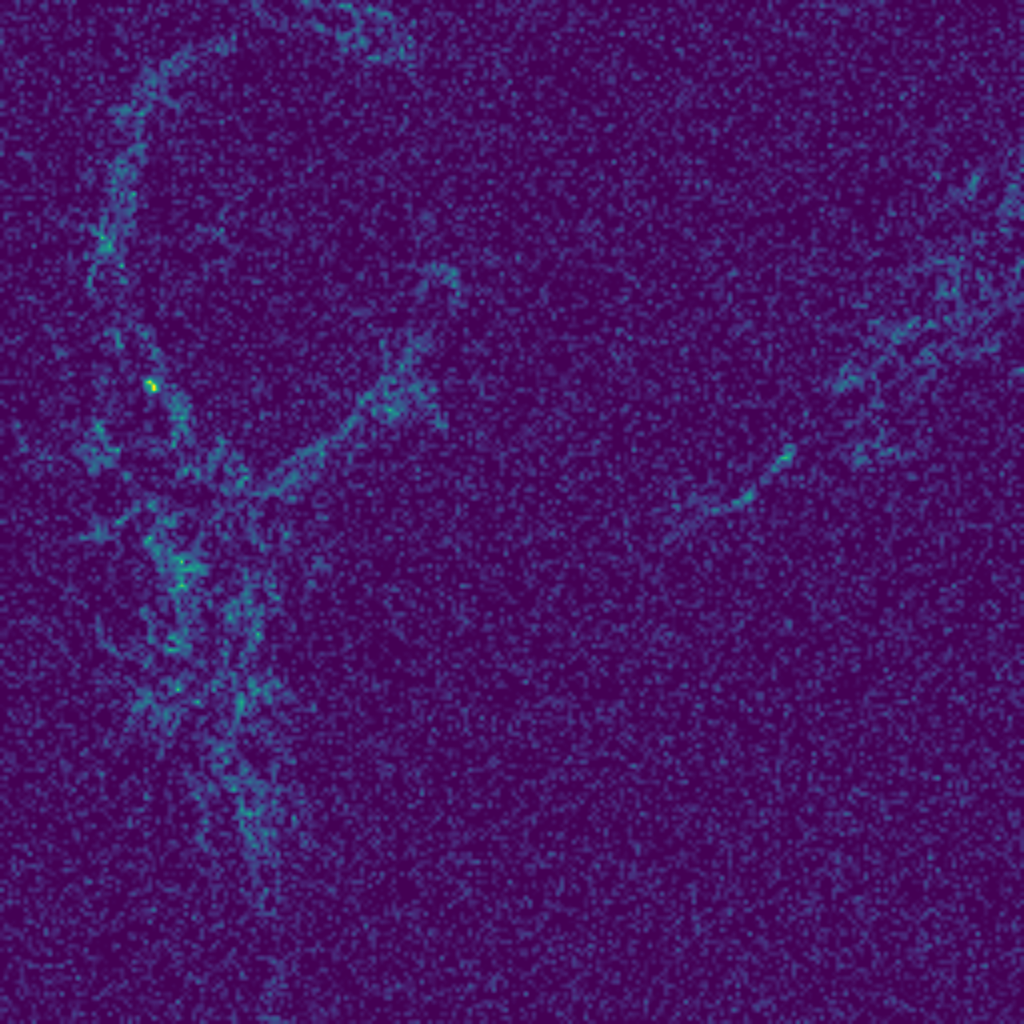

In [57]:
Image(img[0,0:1])

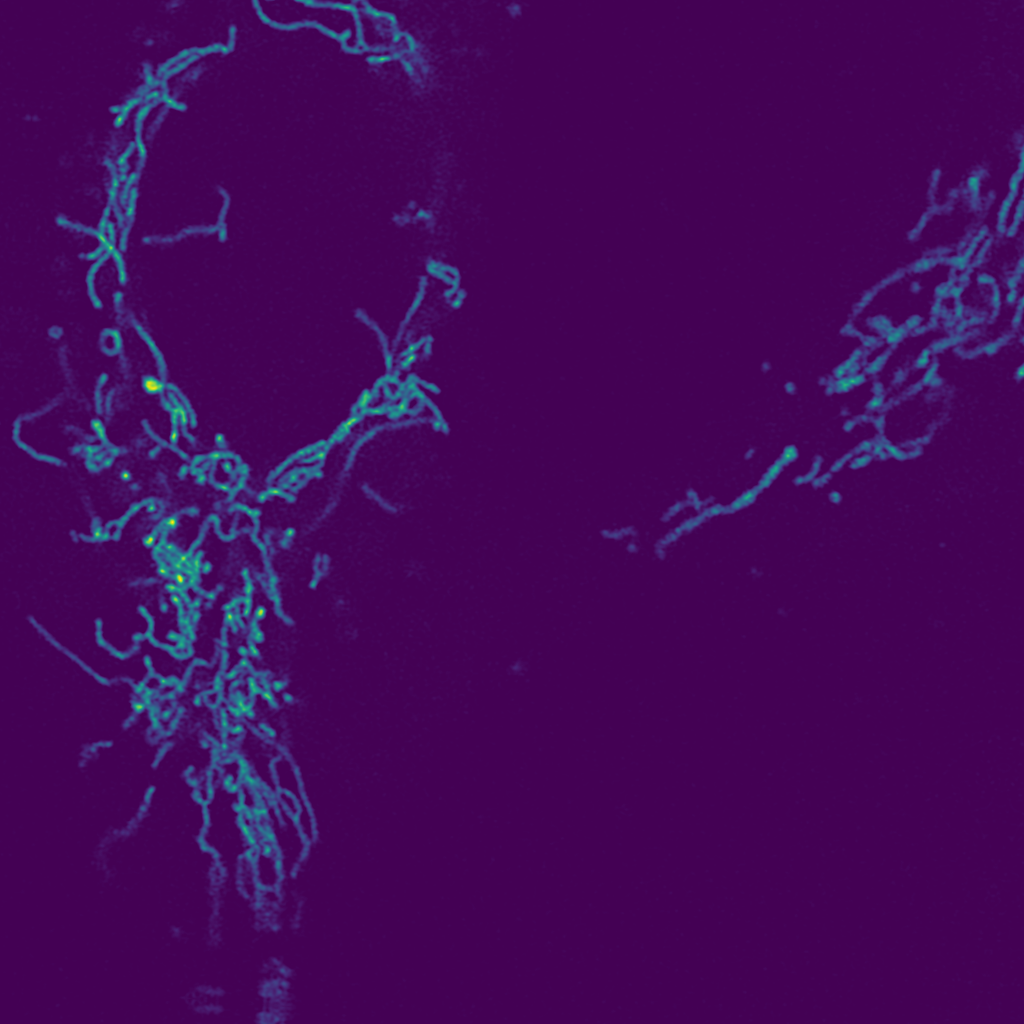

In [58]:
Image(b[1][0])

In [59]:
c = b[1][0].cpu().numpy().copy() * 255

In [60]:
c[c < 30] = 0.

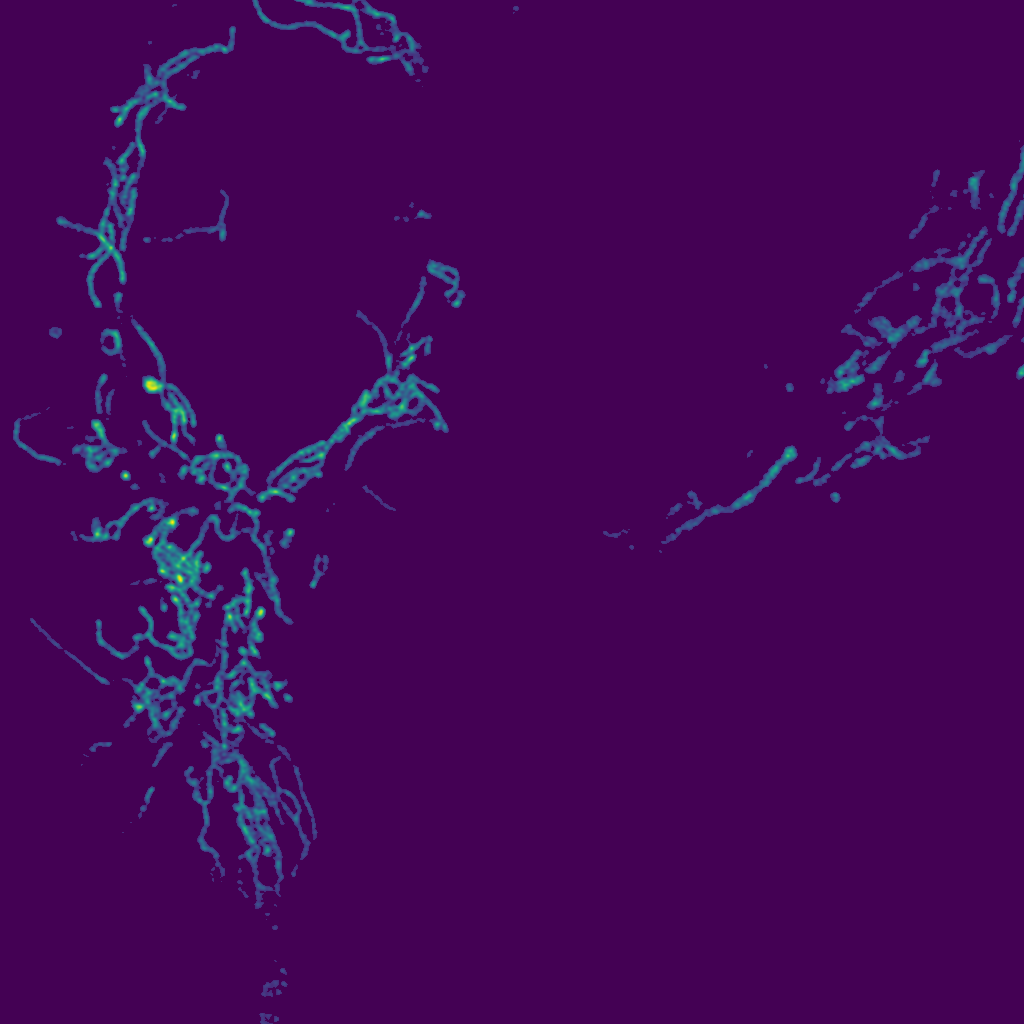

In [61]:
Image(tensor(c))